In [11]:
import voxelsss as vox
import numpy as np
import matplotlib.pyplot as plt
import diffrax as dfx


In [12]:
model = vox.CahnHilliardInversionModel(Nx=100, Ny=100, Nz=100, Lx=100, Ly=100, Lz=100, eps=3.0, A=0.25)

In [13]:
saveat = dfx.SaveAt(ts=np.linspace(0, 100, 100))

In [14]:
res = model.solve({"D": 1.0}, 0.5 + 0.1*np.random.rand(model.Nx, model.Ny, model.Nz), saveat, dt0=0.1)

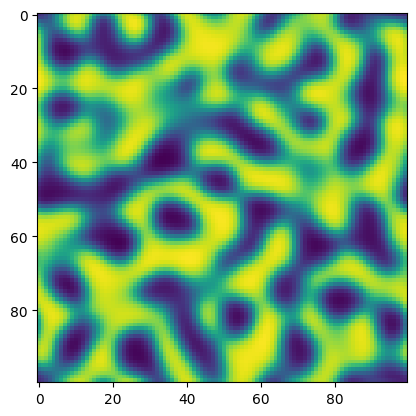

In [15]:
plt.imshow(res[-1,:,:,res.shape[-1]//2])

In [16]:
data = {}
data["ts"] = saveat.subs.ts
data["ys"] = res

inds = [[10,20,30], [40,50,60], [70,80,90]]

In [32]:
tmp = model.train({"D": np.array([2.0])}, data, inds, max_steps=50)

Step: 0, Accepted steps: 0, Steps since acceptance: 0, Loss on this step: 12755.86328125, Loss on the last accepted step: 0.0, Step size: 1.0
Step: 1, Accepted steps: 1, Steps since acceptance: 0, Loss on this step: 537.414794921875, Loss on the last accepted step: 12755.86328125, Step size: 3.5
Step: 2, Accepted steps: 2, Steps since acceptance: 0, Loss on this step: 49.95143508911133, Loss on the last accepted step: 537.414794921875, Step size: 12.25
Step: 3, Accepted steps: 3, Steps since acceptance: 0, Loss on this step: 49.843746185302734, Loss on the last accepted step: 49.951438903808594, Step size: 42.875
Step: 4, Accepted steps: 4, Steps since acceptance: 0, Loss on this step: 49.84375, Loss on the last accepted step: 49.843746185302734, Step size: 10.71875
Step: 5, Accepted steps: 4, Steps since acceptance: 1, Loss on this step: 49.84375, Loss on the last accepted step: 49.843746185302734, Step size: 2.6796875
Step: 6, Accepted steps: 4, Steps since acceptance: 2, Loss on thi

In [33]:
print(tmp.value['D'])

[0.99687725]
